# TASK-3

In [70]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

In [71]:
#Load the Dataset
df=pd.read_csv("image_dataset.csv")
df

,Image_ID,File_Name,Width,Height,Color_Mode,Object_Class,Label,Source,Annotated_By,Date_Created,Is_Augmented
0,IMG_0001,image_0001.jpg,50,158,Grayscale,Cat,1,Camera,Auto,2024-01-01,No
1,IMG_0002,image_0002.jpg,230,35,Grayscale,Horse,6,Dataset,Expert,2024-01-02,No
2,IMG_0003,image_0003.jpg,108,193,Grayscale,Car,4,Camera,Rocky,2024-01-03,Yes
3,IMG_0004,image_0004.jpg,258,99,RGB,Bird,4,Web,Auto,2024-01-04,Yes
4,IMG_0005,image_0005.jpg,285,288,Grayscale,Horse,6,Camera,Rocky,2024-01-05,Yes
...,...,...,...,...,...,...,...,...,...,...,...
145,IMG_0146,image_0146.jpg,90,103,Grayscale,Car,2,Dataset,Team1,2024-05-25,Yes
146,IMG_0147,image_0147.jpg,229,39,Grayscale,Horse,2,Camera,Expert,2024-05-26,Yes
147,IMG_0148,image_0148.jpg,145,60,Grayscale,Plane,6,Web,Auto,2024-05-27,Yes
148,IMG_0149,image_0149.jpg,276,205,RGB,Dog,2,Dataset,Rocky,2024-05-28,Yes


In [72]:
#printing top 5 values
df.head()

,Image_ID,File_Name,Width,Height,Color_Mode,Object_Class,Label,Source,Annotated_By,Date_Created,Is_Augmented
0,IMG_0001,image_0001.jpg,50,158,Grayscale,Cat,1,Camera,Auto,2024-01-01,No
1,IMG_0002,image_0002.jpg,230,35,Grayscale,Horse,6,Dataset,Expert,2024-01-02,No
2,IMG_0003,image_0003.jpg,108,193,Grayscale,Car,4,Camera,Rocky,2024-01-03,Yes
3,IMG_0004,image_0004.jpg,258,99,RGB,Bird,4,Web,Auto,2024-01-04,Yes
4,IMG_0005,image_0005.jpg,285,288,Grayscale,Horse,6,Camera,Rocky,2024-01-05,Yes


In [73]:
#print shape of the dataset
print(df.shape)

(150, 11)


In [74]:
#print how many null values in each columns
print(df.isnull().sum())

Image_ID        0
File_Name       0
Width           0
Height          0
Color_Mode      0
Object_Class    0
Label           0
Source          0
Annotated_By    0
Date_Created    0
Is_Augmented    0
dtype: int64


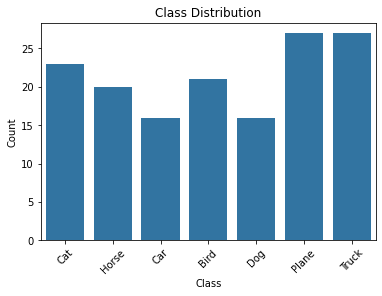

In [75]:
#Visualize the Data
#class distribution
sns.countplot(x='Object_Class', data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

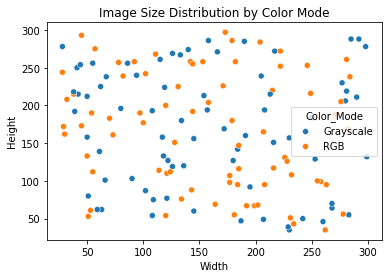

In [76]:
#Width vs Height Distribution
sns.scatterplot(x='Width', y='Height', hue='Color_Mode', data=df)
plt.title('Image Size Distribution by Color Mode')
plt.show()

In [77]:
#Prepare Features (X) and Labels (y)
# Simulate RGB images of size 32x32
X = np.random.rand(150, 32, 32, 3)

# Labels
y = df['Label'].values

# One-hot encode labels
y_cat = to_categorical(y, num_classes=7)


In [78]:
#split X_train,y_train,X_test,y_test and print there shape
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 32, 32, 3)
(120, 7)
(30, 32, 32, 3)
(30, 7)


In [79]:
#Building the CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 output classes
])


In [80]:
#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [81]:
#train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.2)

Epoch 1/10
6/6 [==============================] - 1s 35ms/step - loss: 2.0727 - accuracy: 0.1354 - val_loss: 1.9785 - val_accuracy: 0.0833
Epoch 2/10
6/6 [==============================] - 0s 18ms/step - loss: 1.9680 - accuracy: 0.1562 - val_loss: 1.9568 - val_accuracy: 0.2083
Epoch 3/10
6/6 [==============================] - 0s 19ms/step - loss: 1.9407 - accuracy: 0.1667 - val_loss: 1.9516 - val_accuracy: 0.1667
Epoch 4/10
6/6 [==============================] - 0s 17ms/step - loss: 1.9469 - accuracy: 0.1875 - val_loss: 1.9636 - val_accuracy: 0.0833
Epoch 5/10
6/6 [==============================] - 0s 16ms/step - loss: 1.9277 - accuracy: 0.2188 - val_loss: 1.9638 - val_accuracy: 0.1667
Epoch 6/10
6/6 [==============================] - 0s 16ms/step - loss: 1.9288 - accuracy: 0.1667 - val_loss: 1.9674 - val_accuracy: 0.2083
Epoch 7/10
6/6 [==============================] - 0s 17ms/step - loss: 1.9064 - accuracy: 0.2083 - val_loss: 1.9719 - val_accuracy: 0.2083
Epoch 8/10
6/6 [===========

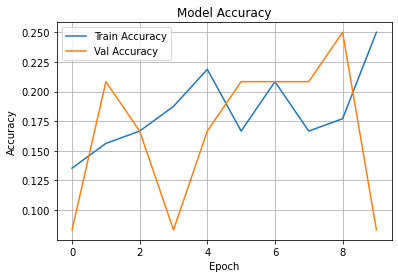

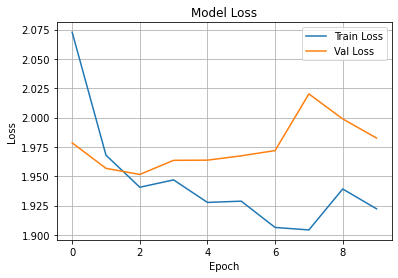

In [82]:
#Visualize Accuracy & Loss
# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

1/1 [==============================] - 0s 18ms/step
Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         2
           3       0.17      1.00      0.29         5
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         4

    accuracy                           0.17        30
   macro avg       0.02      0.14      0.04        30
weighted avg       0.03      0.17      0.05        30



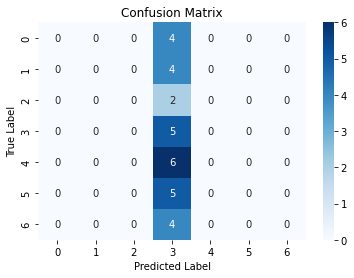

In [86]:
#predict class labels
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes, zero_division=0))

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()




In [87]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Macro averages (suitable when classes are imbalanced)
precision = precision_score(y_true, y_pred_classes, average='macro', zero_division=0)
recall = recall_score(y_true, y_pred_classes, average='macro', zero_division=0)
f1 = f1_score(y_true, y_pred_classes, average='macro', zero_division=0)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Precision: 0.02
Recall: 0.14
F1 Score: 0.04
